In [1]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
#downloading data as the df dataframe
df=pd.read_csv("data/wdbc.data", header=None, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [3]:
"""making column names"""
header=["id", "diagnosis", "radius", "texture", "perimeter", "area", "smoothness", "compactness", "contactivity", "concave_points", "symmetry", "fractal_dimension"]
df.columns=header
df

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,contactivity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [4]:
#checking for NaN values
df.isnull().sum()

id                   0
diagnosis            0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
contactivity         0
concave_points       0
symmetry             0
fractal_dimension    0
dtype: int64

In [5]:
#making the dataframe containing correlation values
cor=df.iloc[:, 2:].corr(method="pearson")
cor

,radius,texture,perimeter,area,smoothness,compactness,contactivity,concave_points,symmetry,fractal_dimension
radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
contactivity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave_points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


<AxesSubplot:>

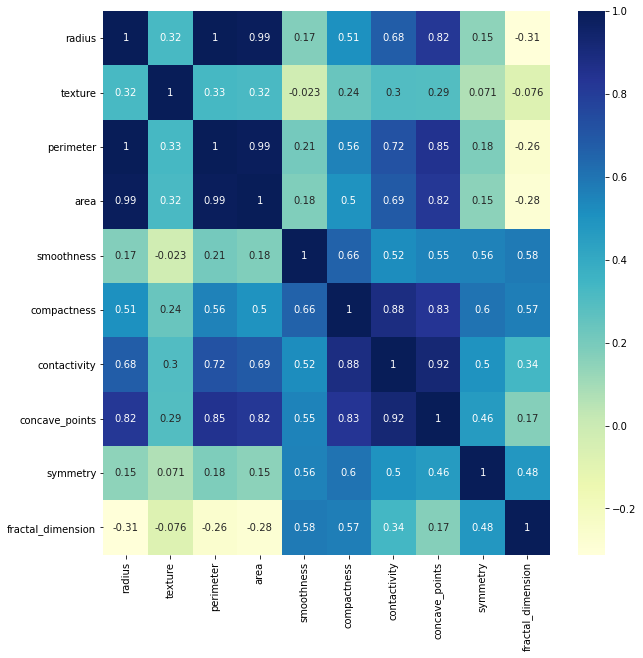

In [6]:
"""visualizing correlation values between features"""
plt.rcParams["figure.figsize"]=(10, 10)
sn.heatmap(data=cor, annot=True, cmap="YlGnBu")

In [7]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(1, 360, '357')

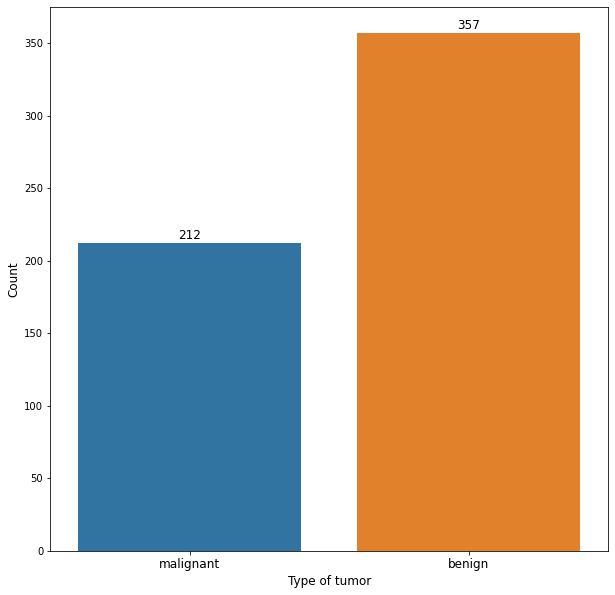

In [8]:
#count plot for the begign and malignant tumors
plot=sn.countplot(df["diagnosis"])

ax=plt.gca()
ax.set_xlabel("Type of tumor", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(["malignant", "benign"], fontsize=12)
ax.text(0, 215, "212", ha="center", fontsize=12)
ax.text(1, 360, "357", ha="center", fontsize=12)

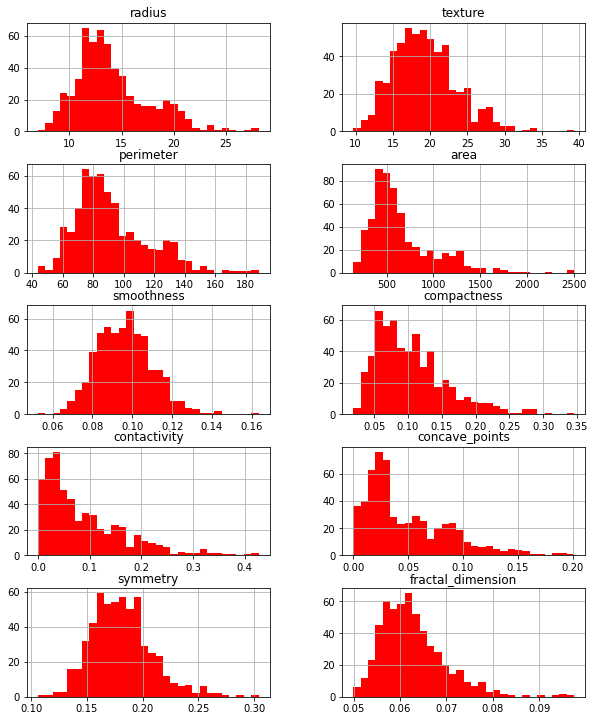

In [9]:
#histogram of the features in the dataset
df.iloc[:, 2:].hist(bins=30, facecolor="red", layout=(6, 2), figsize=(10, 15))
plt.show()

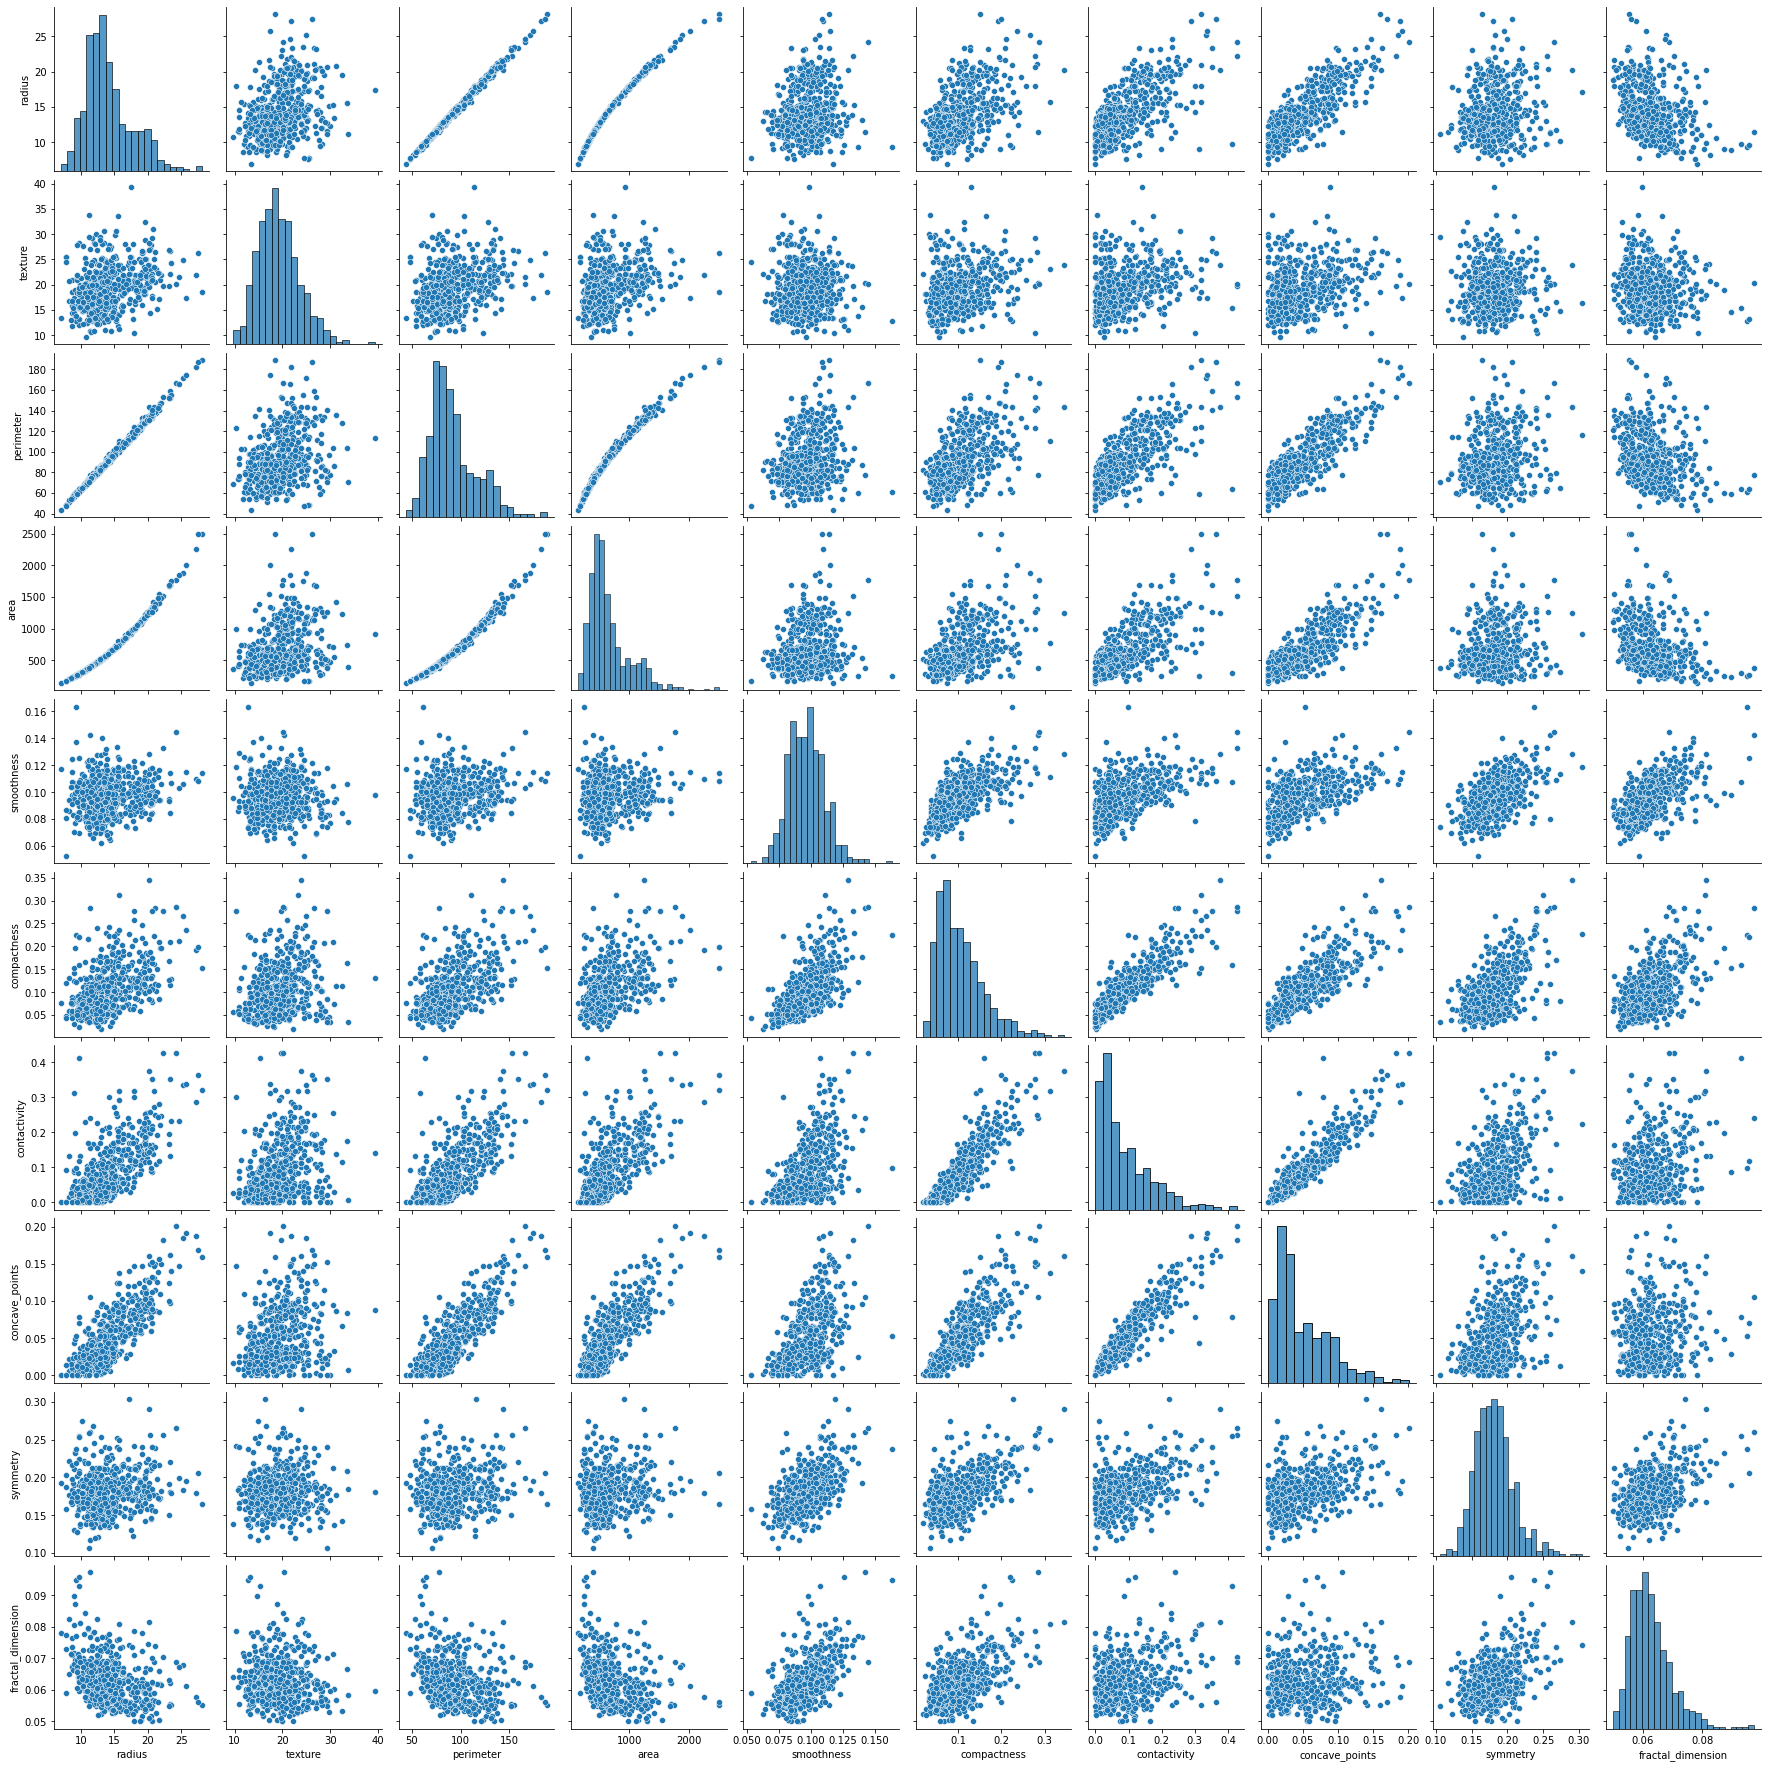

In [10]:
sn.pairplot(df.iloc[:, 2:])

In [11]:
"""making feature array"""
X=df.iloc[:, 2:].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 1.471e-01, 2.419e-01,
        7.871e-02],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 7.017e-02, 1.812e-01,
        5.667e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 1.279e-01, 2.069e-01,
        5.999e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 5.302e-02, 1.590e-01,
        5.648e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 1.520e-01, 2.397e-01,
        7.016e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 1.587e-01,
        5.884e-02]])

In [12]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(df["diagnosis"])
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1000)

In [14]:
#generating pipeline object
model=Pipeline([
    ("scale", StandardScaler()),
    ("lr", LogisticRegression(solver="lbfgs", random_state=1000))
]).fit(X_train, Y_train)

In [15]:
#model parameters
model["lr"].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1000,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [16]:
#model coefficients
model["lr"].coef_

array([[ 1.10535717,  1.24889226,  1.0307919 ,  1.32999987,  0.96419761,
        -0.24312467,  1.00616265,  1.37147184,  0.42998425, -0.36006811]])

In [17]:
#predicted values for the test set
predicted_labels=model.predict(X_test)

In [18]:
"""defining the confusion_matrix_visual() to visualize the confusion matrix"""
def confusion_matrix_visual(y_true, y_pred, class_labels, ax=None, title=None, **kwargs):
    """y_test: true labels for y
       y_pred: predicted labels for y
       class_labels: labels of differemt classes
       ax: matplotlib axes
       title: the plot title
       **kwargs: additional arguments in the form of a dictionary"""
    matrix=confusion_matrix(y_true, y_pred)
    ax=sn.heatmap(matrix.T, square=True, annot=True, fmt="d", cmap=plt.cm.Blues, ax=ax,  **kwargs)
    ax.set_xlabel("Actual")
    ax.set_ylabel("Model Prediction")
    tick_marks=np.arange(len(class_labels))+0.5
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(class_labels)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(class_labels, rotation=0)
    ax.set_title("Confusion matrix")
    return ax

                          Logistic Regression


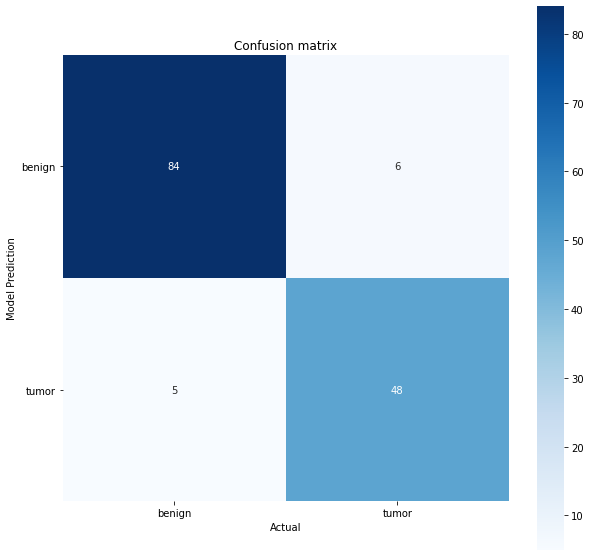

In [19]:
#visualizing the confusion matrix for Logistic Regression
print("                          Logistic Regression")

confusion_matrix_visual(Y_test, predicted_labels, ["benign", "tumor"])
plt.show()

In [20]:
#making the classification report for Logistic Regression

from sklearn.metrics import classification_report
print("Classification report for Logistic Regression")
print("-"*60)
print(classification_report(Y_test, predicted_labels))

Classification report for Logistic Regression
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        89
           1       0.91      0.89      0.90        54

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



### K Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier

""" Defining the function that returns the best k value for the K nearest neigbor algorithm
The function knn_k_value(K, X_train, Y_train, X_test, Y_test) returns an optimal k value"""

def knn_k_value(K, X_train, Y_train, X_test, Y_test):
    mean_acc = np.zeros((K-1))
    std_acc = np.zeros((K-1))

    for n in range(1,K):

        #Train Model and Predict  
        model=Pipeline([
            ("scale", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors = n))
        ]).fit(X_train, Y_train)
        predicted_labels=model.predict(X_test)
        mean_acc[n-1] = metrics.accuracy_score(Y_test, predicted_labels)
        k_value=np.where(mean_acc==mean_acc.max())[0][0]+1
    return k_value
k_value=knn_k_value(10, X_train, Y_train, X_test, Y_test)
print("k value {k_value} was selected for the KNN model")
K=10

k value {k_value} was selected for the KNN model


In [22]:
#making model for K Nearest Neighbors

mean_acc = np.zeros((K-1))
model=Pipeline([
    ("scale", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors = k_value))
]).fit(X_train, Y_train)
predicted_labels=model.predict(X_test)


                          K Nearest Neighbors


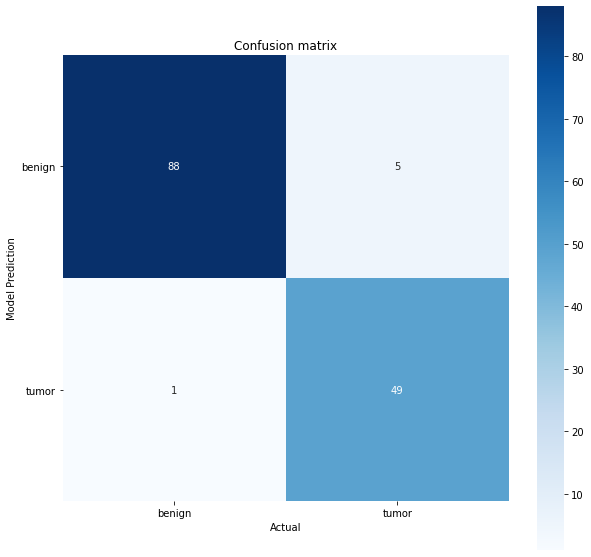

In [23]:
#visualizing the confusion matrix K Nearest Neighbors
print("                          K Nearest Neighbors")

confusion_matrix_visual(Y_test, predicted_labels, ["benign", "tumor"])
plt.show()

In [24]:
#making the classification report for K Nearest Neighbors


from sklearn.metrics import classification_report
print("Classification report for K Nearest Neighbors")
print("-"*60)
print(classification_report(Y_test, predicted_labels))

Classification report for K Nearest Neighbors
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        89
           1       0.98      0.91      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



### Naive Bayes

                          Naive Bayes


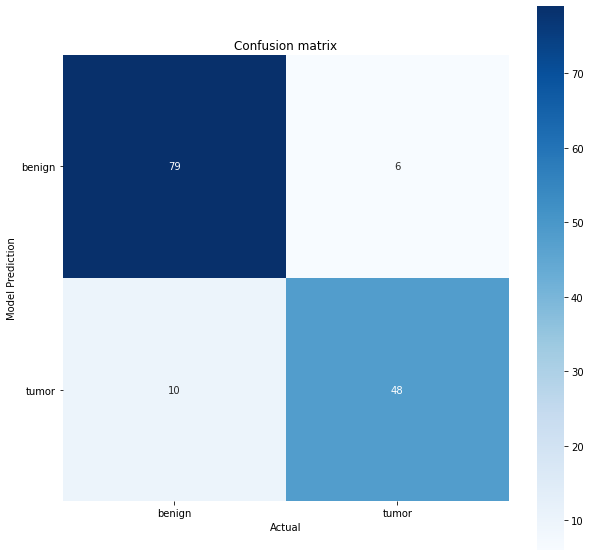

In [25]:
#making model for Naive Bayes

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
model=Pipeline([
    ("scale", StandardScaler()),
    ("NB", GaussianNB())
]).fit(X_train, Y_train)
predicted_labels=model.predict(X_test)

#visualizing the confusion matrix for Naive Bayes
print("                          Naive Bayes")

confusion_matrix_visual(Y_test, predicted_labels, ["benign", "tumor"])
plt.show()


In [26]:
#Classification report for Naive Bayes

print("Classification report for Naive Bayes")
print("-"*60)
print(classification_report(Y_test, predicted_labels))

Classification report for Naive Bayes
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        89
           1       0.83      0.89      0.86        54

    accuracy                           0.89       143
   macro avg       0.88      0.89      0.88       143
weighted avg       0.89      0.89      0.89       143



### Decision Tree 

In [27]:
# making model for Decision Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1000)
model=Pipeline([
    ("scale", StandardScaler()),
    ("Tree", DecisionTreeClassifier())
]).fit(X_train, Y_train)
predicted_labels=model.predict(X_test)



                          Decision Tree


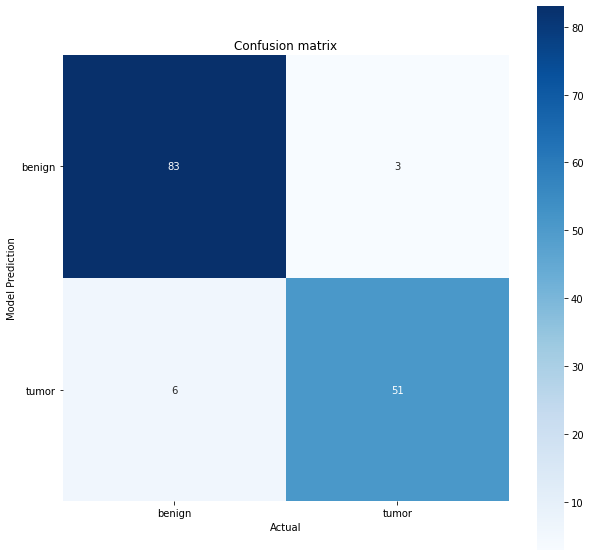

In [28]:
#visualizing the confusion matrix for Decision Tree
print("                          Decision Tree")

confusion_matrix_visual(Y_test, predicted_labels, ["benign", "tumor"])
plt.show()

In [29]:
#Classification report for Decision Tree

print("Classification report for Decision Tree")
print("-"*60)
print(classification_report(Y_test, predicted_labels))

Classification report for Decision Tree
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        89
           1       0.89      0.94      0.92        54

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1000)

In [31]:
#making model for Random Forest

model=Pipeline([
    ("scale", StandardScaler()),
    ("Tree", RandomForestClassifier())
]).fit(X_train, Y_train)
predicted_labels=model.predict(X_test)



                          Random Forest


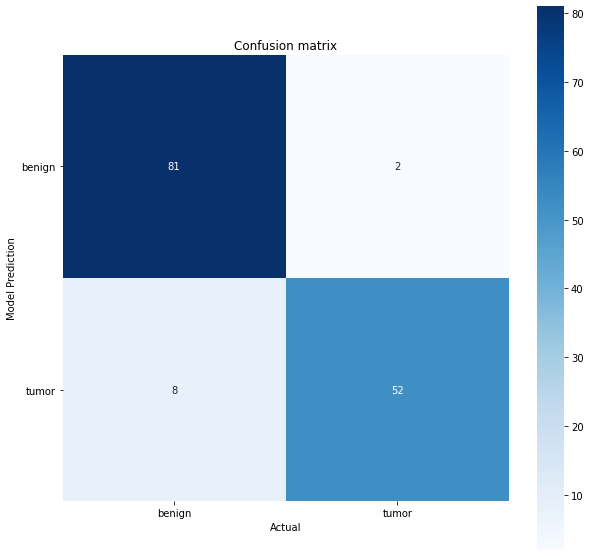

In [32]:
#visualizing the confusion matrix for Random Forest
print("                          Random Forest")

confusion_matrix_visual(Y_test, predicted_labels, ["benign", "tumor"])
plt.show()

In [33]:
#Classification report for Random Forest

print("Classification report for Random Forest")
print("-"*60)
print(classification_report(Y_test, predicted_labels))

Classification report for Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        89
           1       0.87      0.96      0.91        54

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.93      0.93      0.93       143



### Support Vector Machine

                          Support Vector Machine


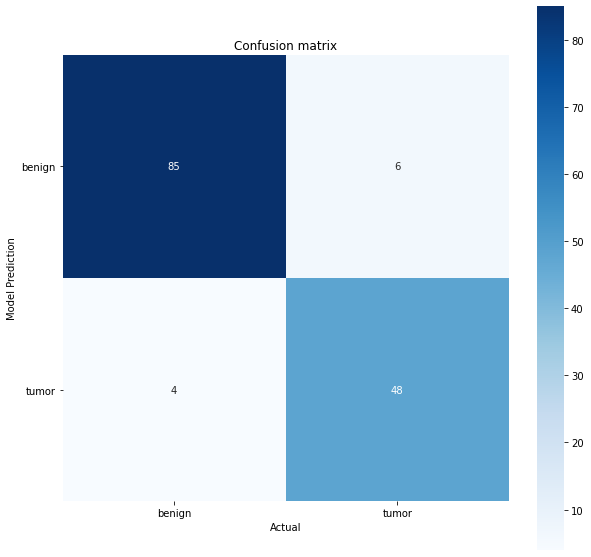

In [34]:
#making model for Support Vector Machine

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 1000)
model=Pipeline([
    ("scale", StandardScaler()),
    ("Tree", SVC())
]).fit(X_train, Y_train)
predicted_labels=model.predict(X_test)

#visualizing the confusion matrix for Support Vector Machine
print("                          Support Vector Machine")

confusion_matrix_visual(Y_test, predicted_labels, ["benign", "tumor"])
plt.show()

In [35]:
#Classification report for Support Vector Machine

print("Classification report for Support Vector Machine")
print("-"*60)

print(classification_report(Y_test, predicted_labels))

Classification report for Support Vector Machine
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        89
           1       0.92      0.89      0.91        54

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143



In [36]:
#making the df_report dataframe containing evaluation metrics for all models used in this research
d={"Logistic Regression":[0.94, 0.89, 0.92], "KNN":[0.99, 0.91, 0.96], "Naive Bayes":[0.89, 0.89, 0.89],
                       "Decision Tree":[0.93, 0.94, 0.94], "Random Forest":[0.91, 0.94, 0.92], "SVM":[0.96, 0.89, 0.93]}
df_report=pd.DataFrame(d, index=["recall=0", "recall=1", "accuracy"])
df_report


,Logistic Regression,KNN,Naive Bayes,Decision Tree,Random Forest,SVM
recall=0,0.94,0.99,0.89,0.93,0.91,0.96
recall=1,0.89,0.91,0.89,0.94,0.94,0.89
accuracy,0.92,0.96,0.89,0.94,0.92,0.93
